### 11.0.0 Problem Statement
In this classification problem we will be attempting to predict the behavior of customers who visit our retail store:

1. During Holidays
2. Based on the size of the store
3. Based on the type of store

### 11.0.1 Dataset
Let us firstly load our data set.

In [1]:
#Import numpy and pandas as their standard aliases. Also import other important variables
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Read the file 'master_dataset.xlsx' into a DataFrame df using the read_xls() function.
df = pd.read_excel('master_dataset.xlsx', sheetname='Sheet1')

In [3]:
# Check the dataset type
type(df)

pandas.core.frame.DataFrame

### 11.0.2 EDA
Printing out the indices of the data set we will see the features of the dataset. The features include :
1. The identity elements
* Store Type (Store)
* Date (Date of Sale)

2. Regional Features
* Temperature
* Fuel Price
* CPI
* Unemployment Rate (Unemployment)

3. Promotional Features
* MarkDown 1 (Sales Promotion announced during Labor Day Holiday)
* MarkDown 2 (Sales Promotion annouced during Independence Day Holiday)
* MarkDown 3 (Sales Promotion announced during Thanksgiving)
* MarkDown 4 (Sales Promotion announced during Christmas)
* MarkDown 5 (Sales Promotion announced in the Summer)

4. Sales Features
* Weekly sales for different types of items: Jewelry - Smart Home Items [Index[14 - Index[95] ~ 81 features in total.

5. Target Features
* IsHoliday
* Type (Store Type: A - SuperStores, B - NeighboorhoodStores, C- WholeSaleStores)
* Size (Store Size)

In [4]:
print(df.keys())

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Jewelry', 'Pets', 'TV_Video',
       'Cell_Phones', 'Pharmaceutical ', 'Health_beauty', 'Toy ',
       'Home_others', 'Kitchen', 'Bedding', 'Bathroom', 'Office_supplies ',
       'School_Supplies', 'Home_Office', 'Craft_general', 'Floral', 'Beading',
       'Paint', 'Framing', 'outdoor', 'Auto', 'School_Uniforms',
       'Baby_Toddlers_Clothing', 'Baby_Kids_Shoes', 'Clearance_Clothings',
       'Boys_Clothing', 'Girls_Clothing', 'Women_Clothing',
       'Intimates_Sleepwears', 'Men_Clothings', 'Precious_Metals',
       'Active_Wear', 'Adult_Shoes', 'Bags_Accessories', 'Sportswear',
       'Computer', 'Music', 'Luggage', 'Food', 'Fruit', 'Grocery', 'Laundry',
       'IPad_Tablets', 'Heating_Cooling', 'Swim_Shop', 'Gift_cards',
       'Baby_Essentials', 'Cribs', 'Car_Seats', 'Strollers', 'Bikes', 'Photo',


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 95 columns):
Store                     8190 non-null int64
Date                      8190 non-null datetime64[ns]
Temperature               8190 non-null float64
Fuel_Price                8190 non-null float64
MarkDown1                 8190 non-null float64
MarkDown2                 8190 non-null float64
MarkDown3                 8190 non-null float64
MarkDown4                 8190 non-null float64
MarkDown5                 8190 non-null float64
CPI                       8190 non-null float64
Unemployment              8190 non-null float64
IsHoliday                 8190 non-null bool
Type                      8190 non-null object
Size                      8190 non-null int64
Jewelry                   8190 non-null float64
Pets                      8190 non-null float64
TV_Video                  8190 non-null float64
Cell_Phones               8190 non-null float64
Pharmaceutical            8190

#### 11.0.3.1 IsHoliday as Target Variable

Target Variable: IsHoliday
* True
* False

In this section, we will predict sales of different items based on whether the the period of sales is a holiday or not. Therefore we will use the Sales features listed in  11.0.2 as the features and the target features as the target.

Let us convert the both the features and the target to numpy array.


In [6]:
# Select the Sales features and call the new dataframe 'df_sales'
df_sales = df.iloc[:,14:95]

In [7]:
df_sales.head()

,Jewelry,Pets,TV_Video,Cell_Phones,Pharmaceutical,Health_beauty,Toy,Home_others,Kitchen,Bedding,...,Books,Musical_Instruments,Star_Wars,Movies_TV,Video_Games,Portable_Audios,Cameras_Camcoders,Auto_Electronics,Wearable_Tech,Smart_homes
0,20094.19,45829.02,9775.17,34912.45,23381.38,2876.19,16481.79,34658.25,44977.91,29764.24,...,73315.81,57022.45,118966.90,58034.24,56157.83,113009.41,27930.71,32954.82,10344.16,0.01
1,57258.43,47450.50,11157.08,37809.49,29967.92,4132.61,22427.62,38151.58,25435.02,31794.04,...,77280.42,57845.36,126907.41,63245.00,66172.11,111466.37,5265.09,30149.20,14740.14,0.01
2,16333.14,47077.72,7857.88,39773.71,18887.71,4541.91,22589.00,35580.01,21032.55,29779.96,...,78602.71,59462.22,122267.65,69962.56,62795.87,124821.44,5265.09,33726.13,10139.42,0.01
3,41595.55,47928.89,11523.47,36826.95,26468.27,6060.26,19985.20,38717.60,15880.85,29634.13,...,76091.36,63011.44,135066.75,62581.64,72212.32,107952.07,28420.73,31585.78,12087.95,20.00
4,19403.54,44292.87,11135.17,34660.16,24101.89,5244.56,17224.22,35318.20,15175.52,27921.96,...,71718.48,57335.17,125048.08,57630.02,55501.07,103652.58,28420.73,28457.31,10871.74,20.00


In [8]:
# Select 'IsHoliday' column as the target and call the new data frame 'df_targetIsHol'
df_targetIsHol = df['IsHoliday']

In [9]:
df_targetIsHol.head()

0    False
1     True
2    False
3    False
4    False
Name: IsHoliday, dtype: bool

In [10]:
# convert df_sales to numpy array
df_sales.values

array([[  2.00941900e+04,   4.58290200e+04,   9.77517000e+03, ...,
          3.29548200e+04,   1.03441600e+04,   1.00000000e-02],
       [  5.72584300e+04,   4.74505000e+04,   1.11570800e+04, ...,
          3.01492000e+04,   1.47401400e+04,   1.00000000e-02],
       [  1.63331400e+04,   4.70777200e+04,   7.85788000e+03, ...,
          3.37261300e+04,   1.01394200e+04,   1.00000000e-02],
       ..., 
       [  1.61091500e+04,   3.36341200e+04,   6.88010000e+03, ...,
          6.46332000e+03,   1.06102000e+03,   7.00000000e+00],
       [  1.61091500e+04,   3.36341200e+04,   6.88010000e+03, ...,
          6.46332000e+03,   1.06102000e+03,   7.00000000e+00],
       [  1.61091500e+04,   3.36341200e+04,   6.88010000e+03, ...,
          6.46332000e+03,   1.06102000e+03,   7.00000000e+00]])

In [11]:
# calculate the shape of the numpy array (df_sales.values)
df_sales.values.shape

(8190, 81)

In [12]:
# convert df_targetIsHol to numpy array
df_targetIsHol.values

array([False,  True, False, ..., False, False, False], dtype=bool)

In [13]:
# calculate the shape of the numpy array (df_targetIsHol.values)
df_targetIsHol.values.shape

(8190,)

In [14]:
# Confirm that both df_sales.values and df_targetIsHol.values are numpy arrays
type(df_sales.values), type (df_targetIsHol.values)

(numpy.ndarray, numpy.ndarray)

Thus we have 8190 samples and 81 features

In [15]:
# Assign X and y to the features and target data respectively
X = df_sales.values
y = df_targetIsHol.values


In [16]:
# Build the data frame of the feature data
df_feature = pd.DataFrame(X, columns=df_sales.columns.values)

In [17]:
print(df_feature.head())

    Jewelry      Pets  TV_Video  Cell_Phones  Pharmaceutical   Health_beauty  \
0  20094.19  45829.02   9775.17     34912.45         23381.38        2876.19   
1  57258.43  47450.50  11157.08     37809.49         29967.92        4132.61   
2  16333.14  47077.72   7857.88     39773.71         18887.71        4541.91   
3  41595.55  47928.89  11523.47     36826.95         26468.27        6060.26   
4  19403.54  44292.87  11135.17     34660.16         24101.89        5244.56   

       Toy   Home_others   Kitchen   Bedding     ...          Books  \
0  16481.79     34658.25  44977.91  29764.24     ...       73315.81   
1  22427.62     38151.58  25435.02  31794.04     ...       77280.42   
2  22589.00     35580.01  21032.55  29779.96     ...       78602.71   
3  19985.20     38717.60  15880.85  29634.13     ...       76091.36   
4  17224.22     35318.20  15175.52  27921.96     ...       71718.48   

   Musical_Instruments  Star_Wars  Movies_TV  Video_Games  Portable_Audios  \
0             

#### 11.0.3.2 Visual EDA
Generate scattter plot for df_features. We will extract the first five features for visualization 


In [32]:
#Extract the first five features for visualization 
df_5feature = df_feature.iloc[:,0:4]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA66F98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000FAAF860>]], dtype=object)

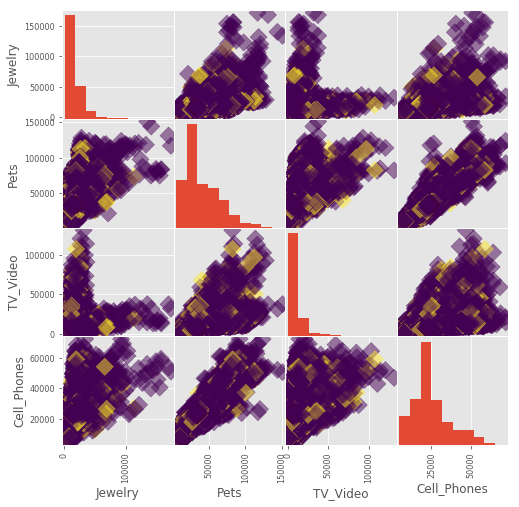

In [33]:
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
pd.scatter_matrix(df_5feature, c=y, figsize = [8, 8], s=150, marker = 'D')
